In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import tensorflow as tf

In [35]:
train_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/'

In [36]:
valid_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/'
test_dir ='/kaggle/input/new-plant-diseases-dataset/test/test/'

In [37]:
size=224
from tensorflow.keras.applications.mobilenet_v2 import  preprocess_input

train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(train_dir,
                      batch_size=16,
                      target_size=(size,size),
                      subset="training",
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=True)

Found 63282 images belonging to 38 classes.


In [39]:
train_generator.class_indices 

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [40]:
train_generator.class_indices.keys()

dict_keys(['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato__

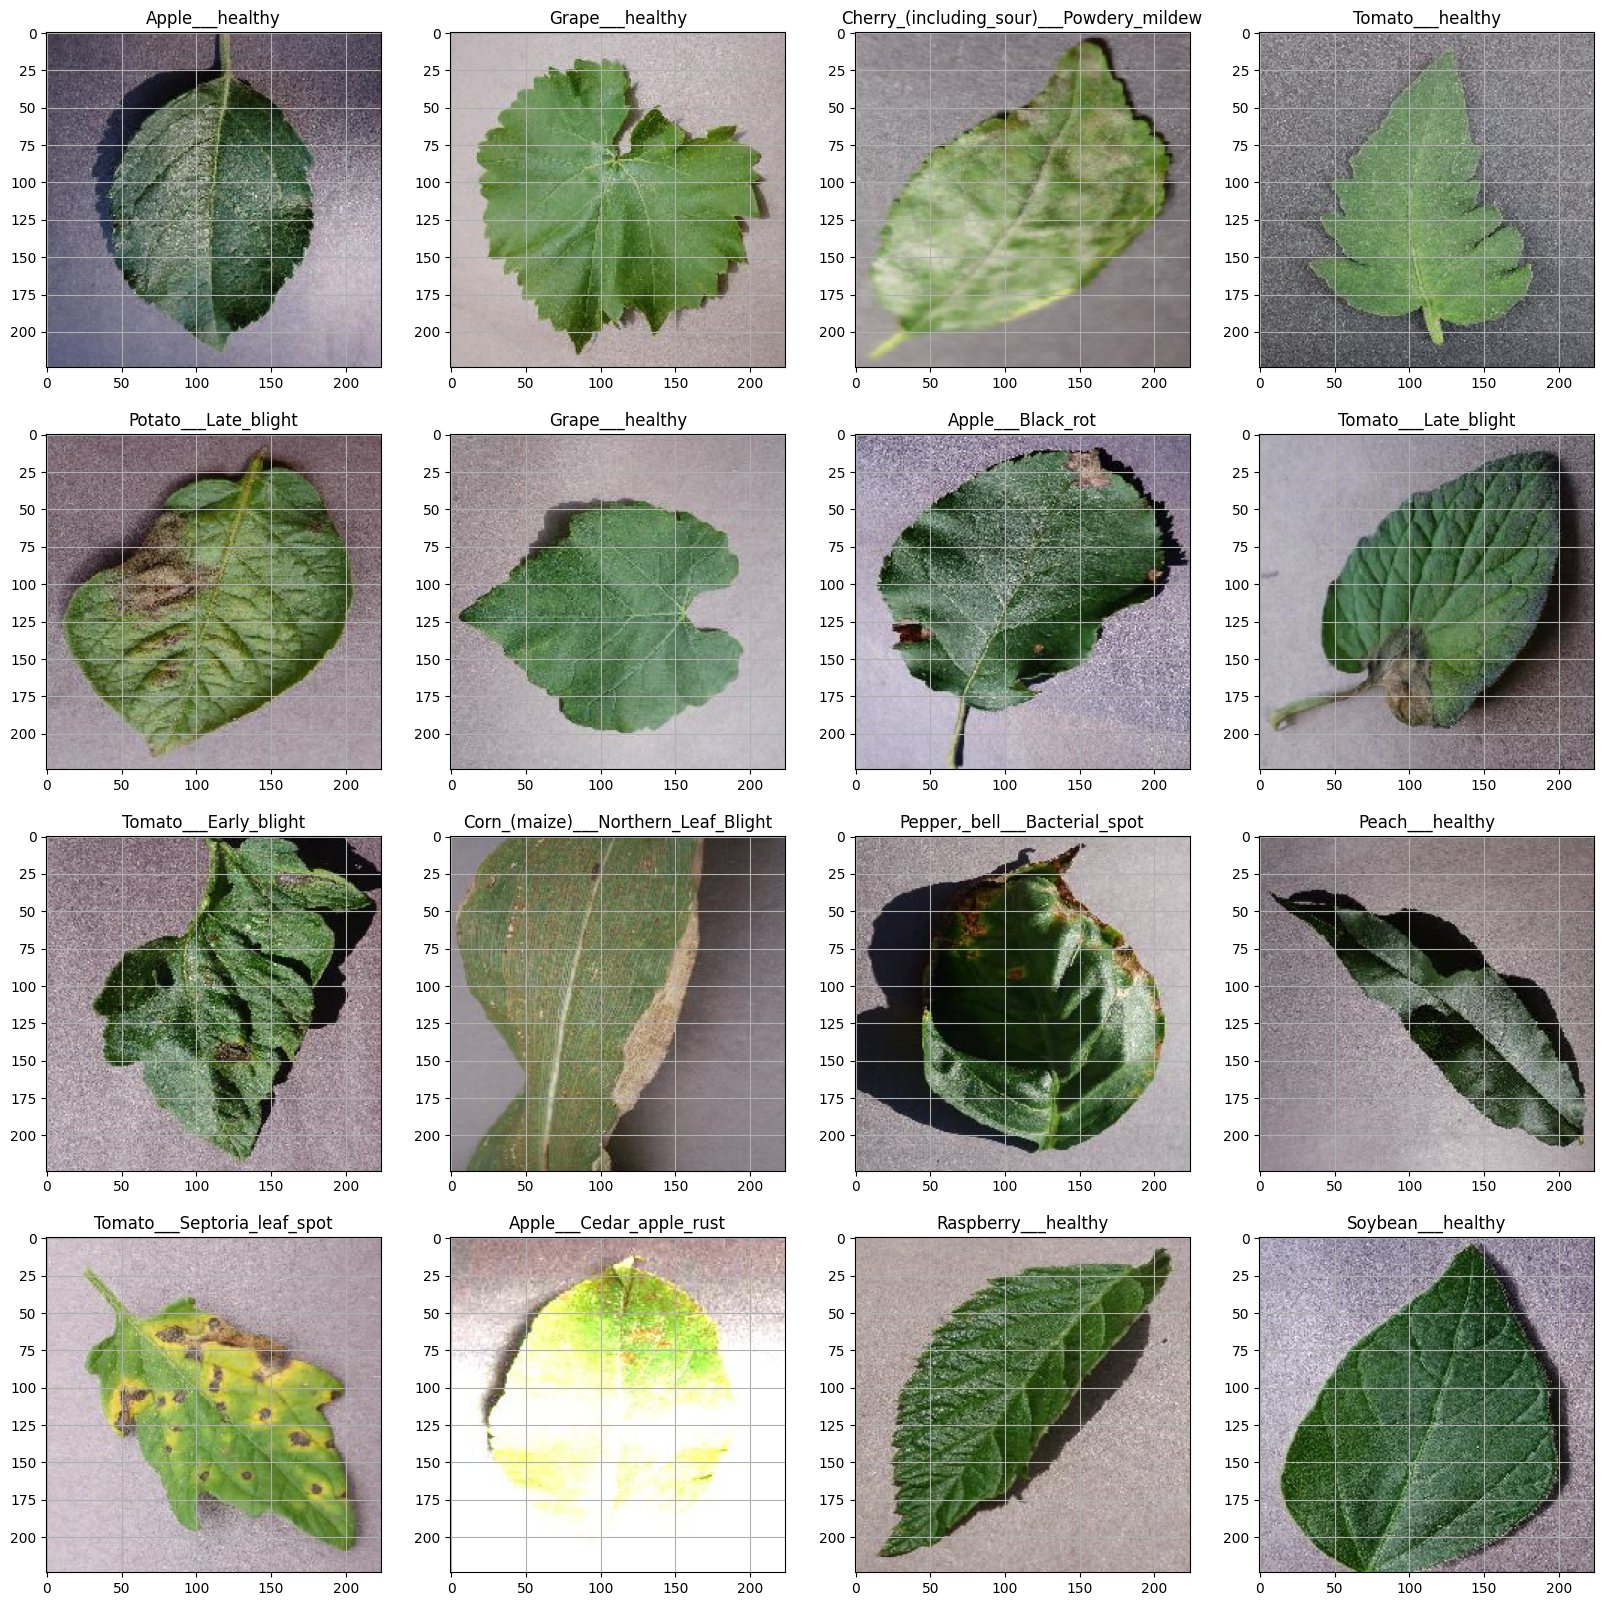

In [42]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])   # when y is categorical
        #plt.title(classes[int(y_batch[i])])   # when y is binary or sparse 
        plt.grid(None)
        
    # show the plot
    plt.show()
    break

In [43]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(train_dir,
                      batch_size=16,
                      target_size=(size,size),
                      subset='validation',
                      seed=123,
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=True)

KeyboardInterrupt: 

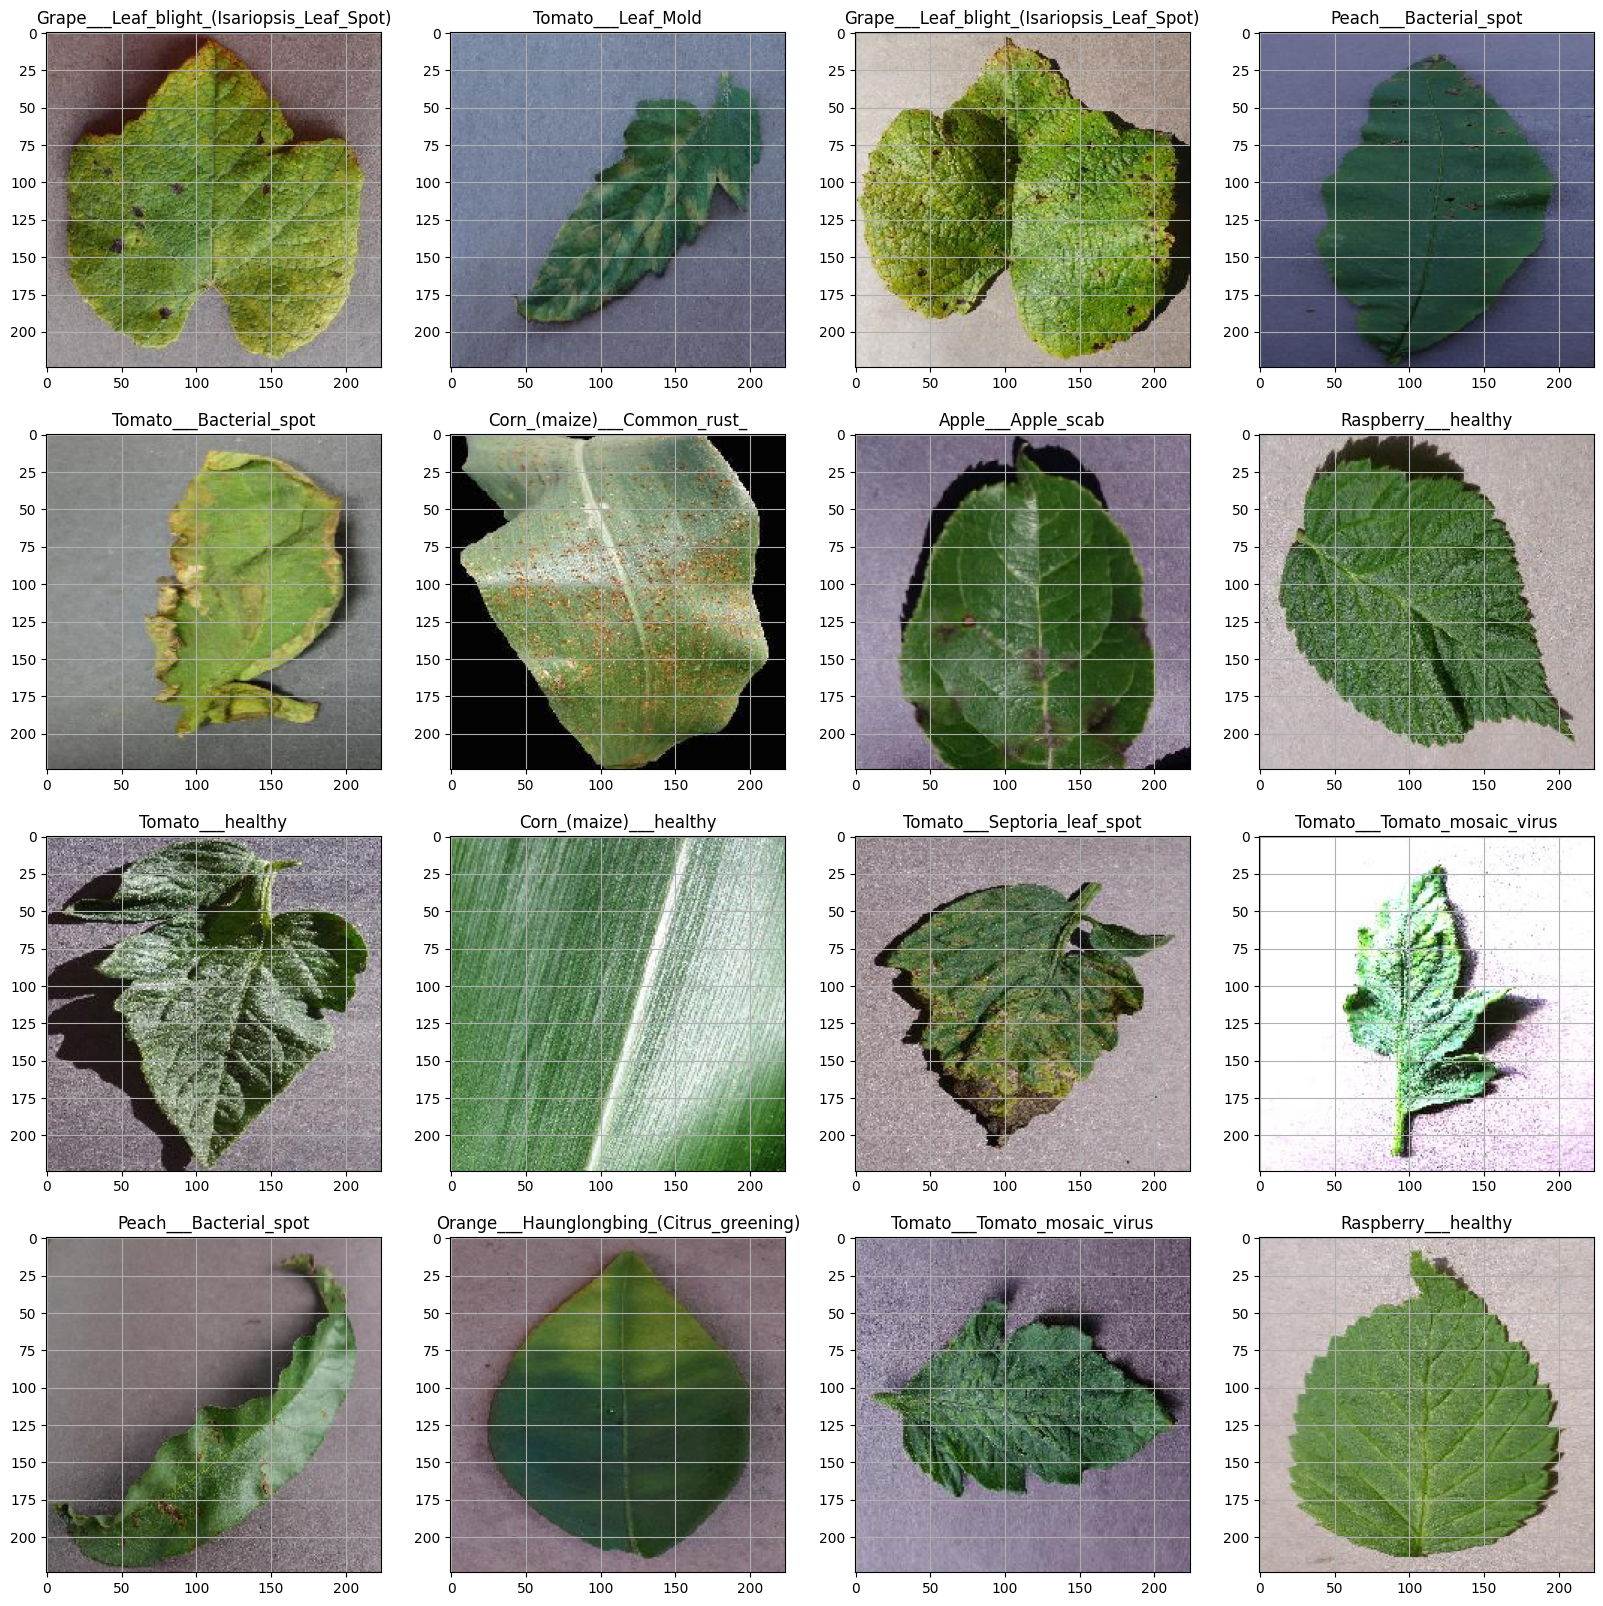

In [44]:
classes=list(valid_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in valid_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])   # when y is categorical
        #plt.title(classes[int(y_batch[i])])   # when y is binary or sparse 
        plt.grid(None)
    # show the plot
    plt.show()
    break

In [45]:
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
     rotation_range=0,
     width_shift_range=0.0,
     height_shift_range=0.0,
     shear_range=0.0,
     zoom_range=0.0,
     horizontal_flip=False,
     vertical_flip=False,
     rescale=1/255.0,
     preprocessing_function=None,
).flow_from_directory(valid_dir,
                       batch_size=16,
                       target_size=(size,size),
                       color_mode='rgb', #"rgb", "rgba", or "grayscale"
                       class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                       shuffle=False)

Found 17572 images belonging to 38 classes.


In [48]:
models = { 
"Xception": tf.keras.applications.Xception,

"VGG16": tf.keras.applications.VGG16,

"VGG19": tf.keras.applications.VGG19,

"ResNet50": tf.keras.applications.ResNet50,

"ResNet101": tf.keras.applications.ResNet101,

"ResNet152": tf.keras.applications.ResNet152,

"InceptionV3": tf.keras.applications.InceptionV3,

"MobileNet": tf.keras.applications.MobileNet,

"MobileNetV2": tf.keras.applications.MobileNetV2,

"DenseNet121": tf.keras.applications.DenseNet121,

"DenseNet169": tf.keras.applications.DenseNet169,

"DenseNet201": tf.keras.applications.DenseNet201,

"NASNetMobile": tf.keras.applications.NASNetMobile,

"NASNetLarge": tf.keras.applications.NASNetLarge,

"EfficientNetB0": tf.keras.applications.EfficientNetB0,

"EfficientNetB1": tf.keras.applications.EfficientNetB1,

"EfficientNetB2": tf.keras.applications.EfficientNetB2,

"EfficientNetB3": tf.keras.applications.EfficientNetB3,

"EfficientNetB4": tf.keras.applications.EfficientNetB4,

"EfficientNetB5": tf.keras.applications.EfficientNetB5,

"EfficientNetB6": tf.keras.applications.EfficientNetB6,

"EfficientNetB7": tf.keras.applications.EfficientNetB7
}

In [49]:
# Define input shape
input_shape = (224, 224, 3)  # Adjust height, width, and channels as needed

# Define inputs
inputs = tf.keras.Input(shape=input_shape)
print(inputs)
model_name = 'VGG19'

# Load the base model
weights_path = r'C:/Users/Samaa/Downloads/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'  # Use raw string or change to forward slashes
base_model = models[model_name](include_top=False, weights="imagenet", input_tensor=inputs)

# Freeze the base model layers
base_model.trainable = False

# Adding layers
#x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(38, activation='softmax')(x)

# Create model
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

# Compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy", 'precision', 'recall'])

# Display summary
model.summary()

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor_28>


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 21,096,038 (80.47 MB)

 Trainable params: 1,070,630 (4.08 MB)

 Non-trainable params: 20,025,408 (76.39 MB)

In [50]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

model_ReduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.000001)

callbacks=[early_stopping,model_checkpoint,model_ReduceLROnPlateau]

In [51]:
# Training the model
history = model.fit(train_generator,
                    epochs = 50,
                    batch_size = None,
                    validation_data = valid_generator,
                    callbacks = callbacks
                    )

Epoch 1/50


I0000 00:00:1730019505.187220     159 service.cc:145] XLA service 0x7de41498fd20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730019505.187279     159 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   1/3956 ━━━━━━━━━━━━━━━━━━━━ 13:33:35 12s/step - accuracy: 0.0000e+00 - loss: 4.2439 - precision: 0.0000e+00 - recall: 0.0000e+00

I0000 00:00:1730019514.179277     159 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3956/3956 ━━━━━━━━━━━━━━━━━━━━ 586s 145ms/step - accuracy: 0.7705 - loss: 0.7784 - precision: 0.8724 - recall: 0.6756 - val_accuracy: 0.6642 - val_loss: 1.4188 - val_precision: 0.7247 - val_recall: 0.6352 - learning_rate: 0.0010
Epoch 2/50
3956/3956 ━━━━━━━━━━━━━━━━━━━━ 232s 59ms/step - accuracy: 0.8682 - loss: 0.4047 - precision: 0.9043 - recall: 0.8353 - val_accuracy: 0.3971 - val_loss: 4.9735 - val_precision: 0.4165 - val_recall: 0.3871 - learning_rate: 0.0010
Epoch 3/50
3956/3956 ━━━━━━━━━━━━━━━━━━━━ 192s 48ms/step - accuracy: 0.8851 - loss: 0.3453 - precision: 0.9144 - recall: 0.8625 - val_accuracy: 0.7960 - val_loss: 0.7022 - val_precision: 0.8316 - val_recall: 0.7699 - learning_rate: 0.0010
Epoch 4/50
3956/3956 ━━━━━━━━━━━━━━━━━━━━ 188s 47ms/step - accuracy: 0.8924 - loss: 0.3239 - precision: 0.9191 - recall: 0.8725 - val_accuracy: 0.8490 - val_loss: 0.4953 - val_precision: 0.8742 - val_recall: 0.8310 - learning_rate: 0.0010
Epoch 5/50
3956/3956 ━━━━━━━━━━━━━━━━━━━━ 188s 47ms/st

In [55]:
model.save('VGG19_model.h5')

In [53]:
train_loss, train_accuracy, train_precision, train_recall = model.evaluate(train_generator)
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_generator)

3956/3956 ━━━━━━━━━━━━━━━━━━━━ 171s 43ms/step - accuracy: 0.9185 - loss: 0.2377 - precision: 0.9346 - recall: 0.9054
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 162s 148ms/step - accuracy: 0.9315 - loss: 0.2002 - precision: 0.9409 - recall: 0.9222


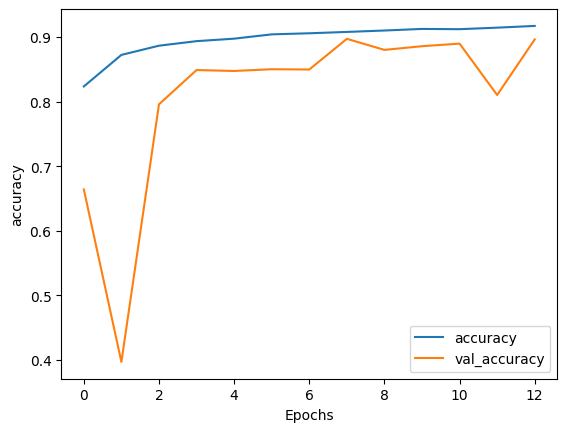

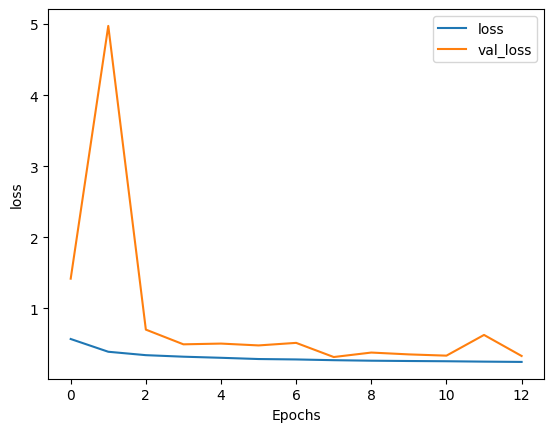

In [57]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+ string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string,'val_'+ string ])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_train_pred = model.predict(train_generator)
y_test_pred = model.predict(test_generator)

y_train_pred_class = np.argmax(y_train_pred, axis=1)
y_test_pred_class = np.argmax(y_test_pred, axis=1)

# Get the true class labels
y_train_true = train_generator.classes
y_test_true = test_generator.classes


f1_train = f1_score(y_train_true, y_train_pred_class, average='weighted')
f1_test = f1_score(y_test_true, y_test_pred_class, average='weighted')

3956/3956 ━━━━━━━━━━━━━━━━━━━━ 153s 39ms/step
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step


In [59]:
data = {
    'model': ['VGG19'],
    'Accuracy train': [train_accuracy],
    'Accuracy test': [test_accuracy],
    'Precision train': [train_precision],
    'Precision test': [test_precision],
    'Recall train': [train_recall],
    'Recall test': [test_recall],
    'F1-score train': [f1_train],
    'F1-score test': [f1_test]
}


metrics_df = pd.DataFrame(data)
metrics_df

model  Accuracy train  Accuracy test  Precision train  Precision test  \
0  VGG19        0.918681       0.901889         0.935446        0.919797   

   Recall train  Recall test  F1-score train  F1-score test  
0      0.905423     0.887605        0.026759       0.899964